# LA Lakers:
### Records of LA Lakers in 08-09 Season
### Data from: http://www.basketballgeek.com/data/  
## 1. Look around the data

In [21]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [22]:
lakers = pd.read_csv('Lakers.csv')

In [23]:
lakers.head(5)

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [24]:
lakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


#Categorical variables:
opponent, game_type, time, etype, team, player, result, type

In [25]:
#Continuous variables: date, period, points, x, y

In [26]:
lakers.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [27]:
lakers.describe(include = object)

,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [28]:
print('Oppenent: ', lakers['opponent'].unique())
print('Game type: ', lakers['game_type'].unique())
print('Period: ', lakers['period'].unique())
print('Etype: ', lakers['etype'].unique())
print('Team: ', lakers['team'].unique())
print('Result: ', lakers['result'].unique())
print('Points: ', lakers['points'].unique())
print('Type: ', lakers['type'].unique())

Oppenent:  ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Game type:  ['home' 'away']
Period:  [1 2 3 4 5]
Etype:  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']
Team:  ['OFF' 'LAL' 'POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN'
 'TOR' 'IND' 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS'
 'UTA' 'GSW' 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Result:  [nan 'missed' 'made']
Points:  [0 2 1 3]
Type:  [nan 'hook' 'off' 'layup' 'shooting' 'personal' 'jump' 'pullup jump' 'def'
 'driving layup' 'driving finger roll layup' 'regular' 'offensive' '3pt'
 'turnaround jump' 'putback layup' 'slam dunk' 'tip' 'dunk'
 'defensive goaltending' 'hook bank' 'running layup' 'official'
 'driving slam dunk' 'short' 'driving reverse layup' 'kicked ball'
 'putback dunk' 'technical' 'alley oop dunk' 'turnaround fa

In [95]:
print("The total number of data: ", lakers.shape[0]*lakers.shape[1])
print("The total number of null values: {} and it occupies {:.2f}% of the toal  ".format(lakers.isnull().sum().sum(), (lakers.isnull().sum().sum()*100)/(lakers.shape[0]*lakers.shape[1])))
print("The number of teams played against LA lakers: ", lakers['opponent'].nunique()-1)
print("The number of actions in the games : ", lakers['etype'].nunique())
print("The number of detail actions in the games: ", lakers['type'].nunique())

The total number of data:  484736
The total number of null values: 33511 and it occupies 6.91% of the toal  
The number of teams played against LA lakers:  28
The number of actions in the games :  10
The number of detail actions in the games:  73


## 2.Questions
### *What is the ratio of 'home game'  and 'away game' in Lakers?
### *What is the most frequently performed 'etypes'  by the players?
### *What are the Lakers' results in this season?
### *Where did the Lakers players perform what positions on the court ?


## 3. Data Preprocessing

### 3-1. Preprocessing the columns of 'time'

In [30]:
# Merge the column of 'date' and 'time' by converting the types into same dtypes. 
lakers['date'] = lakers['date'].apply(str)
lakers['datetime'] = lakers['date'] + ' ' + lakers['time']
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [31]:
## pd.to_datetime[] makes easier when doing time-series analysis.
lakers['datetime'] = pd.to_datetime(lakers['datetime'], format='%Y%m%d %H:%M:%S')
lakers['date'] = pd.to_datetime(lakers['date'], format='%Y%m%d')
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


### 3-2. Preprocessing null values

In [32]:
lakers.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [33]:
print(lakers.index[lakers['x'] == '0'].tolist())
print(lakers.index[lakers['y'] == '0'].tolist())

[]
[]


In [35]:
lakers['x'].fillna(0, inplace = True)
lakers['y'].fillna(0, inplace = True)
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00


## 4.EDA & Visualizaion

### 4-1. *What is the ratio of 'home game'  and 'away game' in Lakers?

In [38]:
# Do you wanna see if it is a home game or away game by dates?
lakers[['date', 'game_type']].groupby(['date', 'game_type']).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [39]:
lakers[['date', 'game_type']].groupby(['date', 'game_type']).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [40]:
# The ratio of home game and away game:
df1 = lakers.drop_duplicates(['date'], keep='first')
df1

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-12 12:00:00


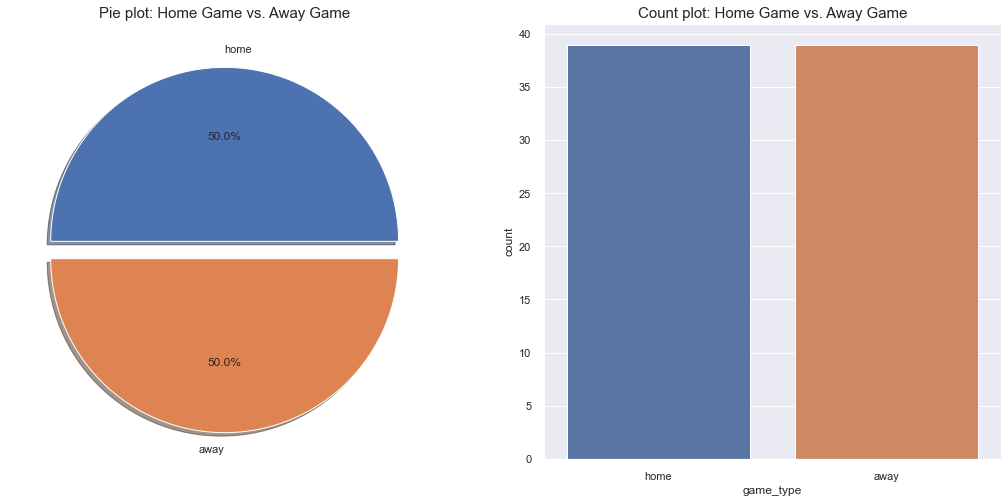

In [46]:
# Visualization
f, ax = plt.subplots(1,2, figsize = (18,8))

#pie plot
df1['game_type'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow =True)
ax[0].set_title("Pie plot: Home Game vs. Away Game", size=15)
ax[0].set_ylabel("")

#countplot
sns.countplot(data=df1, x = 'game_type', ax=ax[1])
ax[1].set_title("Count plot: Home Game vs. Away Game", size=15)

plt.show()

### 4-2. Check the 'etypes' performed in the games

In [48]:
# How many etypes in the data?
print("Etype: ", lakers['etype'].unique())

Etype:  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']


In [49]:
lakers['etype'].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

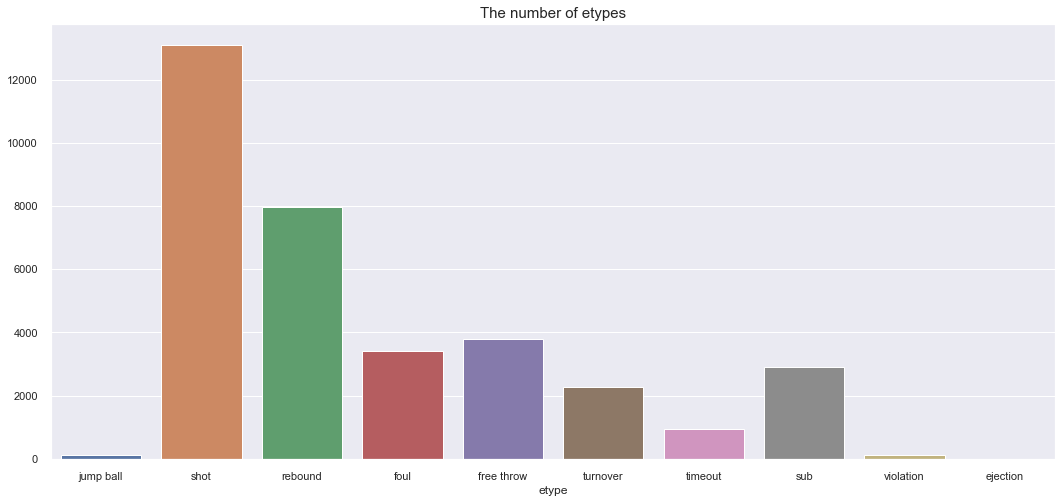

In [50]:
f, ax = plt.subplots(1,1, figsize=(18,8))

sns.countplot(x=lakers['etype'], ax=ax)
ax.set_title("The number of etypes", size=15)
ax.set_ylabel('')

plt.show()

In [51]:
## Look into the 'etypes' by quarters('period' varriables)
df2 = lakers.groupby(['etype', 'period']).size().reset_index().pivot(columns='period', index='etype',values=0)
df2

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


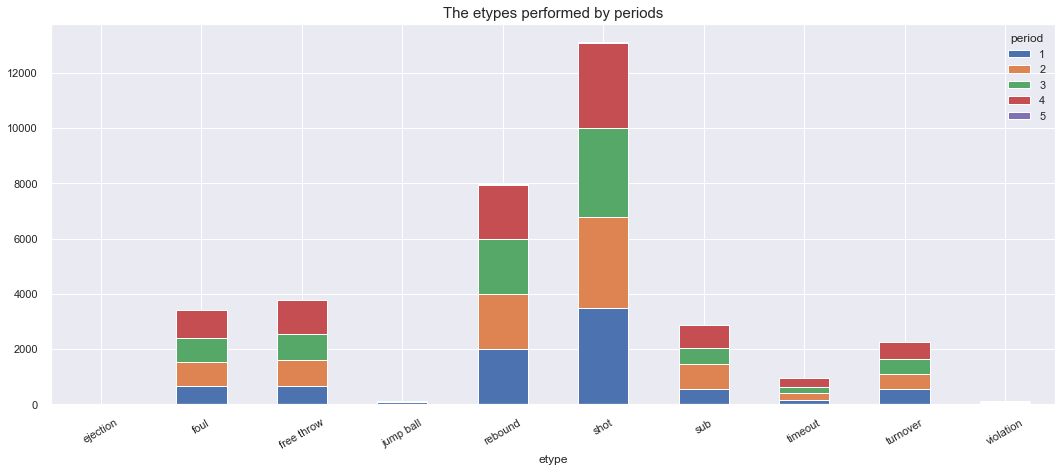

In [53]:
#stack plot
# which columns are stacked? >> There are lots of etypes hence divide thme by quarters.
df2.plot(kind='bar', stacked=True, figsize=(18,7))
plt.title("The etypes performed by periods", size=15)
plt.xticks(rotation=30)

plt.show()

### 4-3.Summarize the results of the games and visualize time-series graph.

In [56]:
made = lakers['result'].isin(['made'])
lakers[made].head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
7,2008-10-28,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,0.0,0.0,2008-10-28 11:22:00
9,2008-10-28,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,2008-10-28 10:53:00
10,2008-10-28,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,2008-10-28 10:45:00
13,2008-10-28,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,2008-10-28 10:21:00


In [59]:
df3 = lakers[made][['date', 'team', 'points']].groupby(['date', 'team'], as_index=True).sum()
df3

points
date       team        
2008-10-28 LAL       96
           POR       76
2008-10-29 LAC       79
           LAL      117
2008-11-01 DEN       97
...                 ...
2009-04-10 POR      106
2009-04-12 LAL       92
           MEM       75
2009-04-14 LAL      125
           UTA      112

[156 rows x 1 columns]

In [60]:
df3.reset_index(inplace=True)
df3

,date,team,points
0,2008-10-28,LAL,96
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
3,2008-10-29,LAL,117
4,2008-11-01,DEN,97
...,...,...,...
151,2009-04-10,POR,106
152,2009-04-12,LAL,92
153,2009-04-12,MEM,75
154,2009-04-14,LAL,125


In [66]:
# Divide the results into lakers vs opponents.
lal = df3[df3['team'] == 'LAL']
opp = df3[df3['team'] != 'LAL']
lal

,date,team,points
0,2008-10-28,LAL,96
3,2008-10-29,LAL,117
5,2008-11-01,LAL,104
7,2008-11-05,LAL,106
9,2008-11-09,LAL,111
...,...,...,...
146,2009-04-07,LAL,122
149,2009-04-09,LAL,116
150,2009-04-10,LAL,98
152,2009-04-12,LAL,92


In [67]:
#pd.merge >> key = 'date'
df4 = pd.merge(lal, opp, on = 'date')
df4

,date,team_x,points_x,team_y,points_y
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
75,2009-04-10,LAL,98,POR,106
76,2009-04-12,LAL,92,MEM,75


In [77]:
# Compare with win and lose.
win = df4[df4['points_x'] > df4['points_y']]
los = df4[df4['points_x'] < df4['points_y']]
win.shape[0]
print("LA lakers won {} games among {} games in 08-09 season".format(df4[df4['points_x'] > df4['points_y']].shape[0], df4.shape[0]))

LA lakers won 63 games among 78 games in 08-09 season


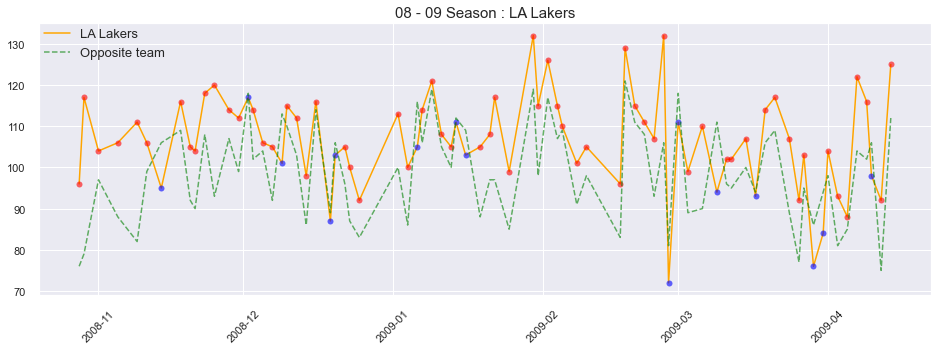

In [81]:
# visualize the results of games in time-series graph.
plt.figure(figsize=(16,5))

plt.title("08 - 09 Season : LA Lakers", fontsize=15)
plt.plot(lal['date'], lal['points'], "-", alpha=1, color = "orange",
        label = 'LA Lakers')
plt.plot(win['date'], win['points_x'], 'o', alpha=.6, color = "red")
plt.plot(los['date'], los['points_x'], 'o', alpha=.6, color = "blue")

plt.plot(opp['date'], opp['points'], "--", alpha=.6, color = "green",
        label = 'Opposite team')
plt.legend(loc='upper left', borderaxespad=0, fontsize=13)
plt.xticks(rotation=45)

plt.show()


### 4.4 The actions of players by court position.

In [84]:
lal2 = lakers[lakers['team'] == 'LAL']
lal2

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34616,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,2009-04-14 00:54:00
34617,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,2009-04-14 00:54:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,2009-04-14 00:42:00
34621,2009-04-14,UTA,home,0:27,4,turnover,LAL,Andrew Bynum,NaN,0,NaN,0.0,0.0,2009-04-14 00:27:00


C:\Users\hyung\anaconda3\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


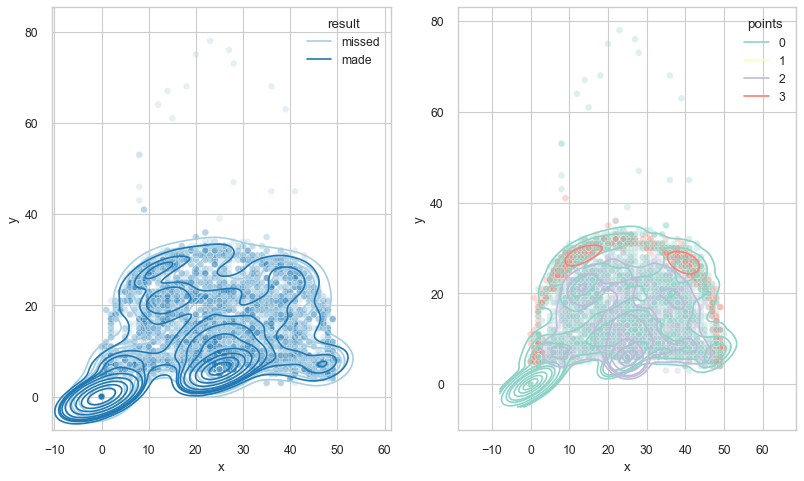

In [89]:
## where players shot?
## where did the scoring take place?
sns.set_style('whitegrid')
f, ax = plt.subplots(1,2, figsize = (12,7), dpi = 80)

#The distribution of scoring success/scoring failure
g1 = sns.scatterplot(data=lal2, x='x', y='y', hue='result', alpha=0.3, palette='Paired', ax=ax[0])
g2 = sns.kdeplot(data=lal2, x='x', y='y', hue='result', palette='Paired', ax=ax[0])

#The distribution of scores when they got scores.
g3 = sns.scatterplot(data=lal2, x='x', y='y', hue='points', alpha=0.3, palette='Set3', ax=ax[1])
g4 = sns.kdeplot(data=lal2, x='x',y='y', hue='points', palette='Set3', ax=ax[1])

plt.show()
## There is a concentration near 0 since Nan of x, y was preprocessed as '0'

In [90]:
# What will be the shooting position for each detailed action?
# Pick the 10 most common detailed action
lal3 = lal2[lal2['type'].isin(lal2['type'].value_counts().head(10).index)]
lal3

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34603,2009-04-14,UTA,home,2:12,4,shot,LAL,Jordan Farmar,missed,0,jump,40.0,7.0,2009-04-14 02:12:00
34605,2009-04-14,UTA,home,2:06,4,foul,LAL,Jordan Farmar,NaN,0,shooting,0.0,0.0,2009-04-14 02:06:00
34611,2009-04-14,UTA,home,1:27,4,rebound,LAL,Josh Powell,NaN,0,def,0.0,0.0,2009-04-14 01:27:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,2009-04-14 00:42:00


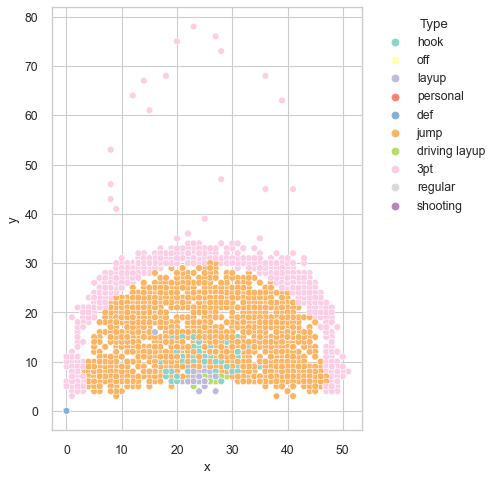

In [94]:
sns.set_style('whitegrid')
f, ax = plt.subplots(1, 1, figsize=(5, 7), dpi = 80)

sns.scatterplot(data=lal3, x='x', y='y', hue=lal3['type'], palette='Set3', ax=ax)

#Legend가 10개이기 때문에 그래프 안에 넣으면 혼란스럽다. 옆으로 빼 주자!
ax.legend(title='Type', bbox_to_anchor= (1.03, 1))

plt.show()

## 5.Review
### The total number of data:  450112
### The total number of null values: 76625 = It occupies 17.02% of the toal  
### The number of teams played against LA lakers:  28
###  The number of actions in the games :  10
### The number of detail actions in the games:  73
### The ratio of home game vs away game is 1:1 (half & half)
### Q: What is the most frequently performed 'etypes'  by the players?
#### A: 1.Shoot 2. Rebound
### Q: What are the Lakers' results in this season?
#### A: LA lakers won 63 games among 78 games in 08-09 season
### Q: Where did the Lakers players perform what positions on the court ?
#### A: The players in LA Lakers had more success when they shot from the left based on the opponent's goal.
### Q: Further possible points to be analyzed?
#### A: Analyze the patterns of 'Kobe Bryant" 